Covid-19's impact on US Company Earnings: Deep Dive
Goal: How has Covid-19 affected stock market reaction to company earnings across different industries within the US. Analysis will be divided into two time frames with two sub categories each:
Time periods:
Before the pandemic (Normal)
After the pandemic(Alternate)
Sub Categories:
The two week period leading up towards an earnings report
Stock market reaction to earnings report the following day after

Data:
Earnings data and stock data will be gathered from yahoo finance, publicly available data source. Data collection will be done through webscraping and open source, public packages.

Analysis:

Conclusion:

In [1]:
######Data Collection###########

In [1]:
from bs4 import BeautifulSoup 
import requests 
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
from time import sleep
import scipy as sp


In [3]:
#### S&P Company List ####
html = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
spy_co = []
html_request = requests.get(html)
soup = BeautifulSoup(html_request.content, 'html.parser')
table = soup.find('table')
tablerows = table.find_all('tr')
a = pd.DataFrame()
for tr in tablerows:
    td = tr.find_all('td')
    if not td:
        continue
    row = [i.text for i in td]
    spy_co.append(row)
spy_co = pd.DataFrame(spy_co)
for (columnName, columnData) in spy_co.iteritems():
    spy_co[columnName] = spy_co[columnName].str.strip()
spy_co.columns = ['Ticker', 'Company_Name', 'SEC_Filings', 'Sector', 'Industry', 'HQ Location', 
                 'Date Added', 'CIK Number', 'Year Founded']
spy_co.head()

,Ticker,Company_Name,SEC_Filings,Sector,Industry,HQ Location,Date Added,CIK Number,Year Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,0000066740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989


In [6]:
start_date = date(2016, 1, 1)   # start date
end_date = date(2020, 9, 1)   # end date
it = 1

import yfinance as yf
a  = yf.Ticker(spy_co['Ticker'][0])
stock_data= a.history(start = start_date, end= end_date)
stock_data['Ticker'] = spy_co['Ticker'][0]
for val in spy_co['Ticker'][1:]:
    a = yf.Ticker(val).history(start = start_date, end = end_date)
    a['Ticker'] = val
    stock_data = stock_data.append(a)
    sleep(1.5)
    it = it +1


In [8]:
def earnings_scrape(ticker): 
    html = 'https://finance.yahoo.com/calendar/earnings?symbol=' + ticker
    earnings = []
    html_request = requests.get(html)
    soup = BeautifulSoup(html_request.content, 'html.parser')
    table = soup.find('table')
    if table == None:
        return
    tablerows = table.find_all('tr')
    for tr in tablerows:
        td = tr.find_all('td')
        if not td:
            continue
        row = [i.text for i in td]
        row.append(html[-10:])
        earnings.append(row)
    return pd.DataFrame(np.array(earnings[0:12]))



In [10]:
#######Manual Scraping For Earnings#######
tickers =list(spy_co.Ticker)
tickers.sort()
earnings = earnings_scrape(tickers[0])
for tic in tickers[1:]:
    e = earnings_scrape(tic)
    if e is None:
        print(tic)
    earnings =earnings.append(e)
    sleep(1.75)


In [679]:
earnings_frame = earnings
earnings_frame = earnings_frame.drop(columns = [6])
earnings_frame.columns = ['Ticker', 'Company_Name', 'Earnings Date', 'EPS Estimate', 'Actual EPS', '% Difference']



In [680]:
earnings_frame['% Difference'] = earnings_frame['% Difference'].replace('-', np.NaN)
earnings_frame['Actual EPS'] = earnings_frame['Actual EPS'].replace('-', np.NaN)
earnings_frame['EPS Estimate'] = earnings_frame['EPS Estimate'].replace('-', np.NaN)


earnings_frame['% Difference'] = earnings_frame['% Difference'].replace('+', '')

earnings_frame['% Difference']= earnings_frame['% Difference'].astype('float')
earnings_frame['Actual EPS']= earnings_frame['Actual EPS'].astype('float')
earnings_frame['EPS Estimate']= earnings_frame['EPS Estimate'].astype('float')
earnings_frame['Earnings Date'] = earnings_frame['Earnings Date'].str.replace(r', \d+ \w+$', '')


earnings_frame.head()



,Ticker,Company_Name,Earnings Date,EPS Estimate,Actual EPS,% Difference
0,A,"Agilent Technologies, Inc.","Aug 18, 2020",0.66,0.78,17.65
1,A,"Agilent Technologies, Inc.","May 21, 2020",0.61,0.71,17.16
2,A,"Agilent Technologies, Inc.","Feb 18, 2020",0.81,0.81,0.12
3,A,"Agilent Technologies, Inc.","Nov 25, 2019",0.86,0.89,4.09
4,A,"Agilent Technologies, Inc.","Aug 14, 2019",0.72,0.76,5.12


In [287]:
earnings.to_csv('earnings_latest.csv')

In [68]:
spy_co.to_csv('Company Information.csv')

In [294]:
stock_data =stock_data.reset_index()

In [298]:
stock_data.to_csv('S&P500_StockData.csv')

Data Cleaning and Analysis

In [14]:
%matplotlib inline
import datapackage
import matplotlib.pyplot as plt
import seaborn

In [15]:
stock_data = pd.read_csv('S&P500_StockData.csv' )
stock_data = stock_data.drop_duplicates()
stock_data =stock_data.drop(columns = ['Adj Close', 'Dividends', 'Unnamed: 0'])
stock_data

,Date,Close,High,Low,Open,Stock Splits,Ticker,Volume
0,2016-01-04,128.03,129.34,126.79,129.11,0.0,MMM,3277200.0
1,2016-01-05,128.59,128.63,126.98,128.03,0.0,MMM,2688100.0
2,2016-01-06,126.00,127.11,125.07,126.96,0.0,MMM,2997100.0
3,2016-01-07,122.93,124.82,122.64,124.28,0.0,MMM,3553500.0
4,2016-01-08,122.51,124.27,122.28,123.27,0.0,MMM,2664000.0
...,...,...,...,...,...,...,...,...
582087,2020-08-25,158.58,158.87,156.64,157.99,0.0,ZTS,1076100.0
582088,2020-08-26,159.76,160.41,157.22,157.58,0.0,ZTS,1917800.0
582089,2020-08-27,159.61,161.03,158.57,160.00,0.0,ZTS,1121700.0
582090,2020-08-28,160.00,160.18,158.59,159.41,0.0,ZTS,926000.0


In [16]:
earnings_data = pd.read_csv('earnings_latest.csv')
earnings_data = earnings_data.drop(columns = ['Unnamed: 0'])
earnings_data['Earnings_Date'] = pd.to_datetime(earnings_data['Earnings_Date'])
earnings_data




,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference
0,A,2016-02-16,01/2016,0.430,0.46,post,0.069767
1,A,2016-05-16,04/2016,0.390,0.44,post,0.128205
2,A,2016-08-17,07/2016,0.470,0.49,post,0.042553
3,A,2016-11-15,10/2016,0.520,0.59,post,0.134615
4,A,2017-02-14,01/2017,0.490,0.53,post,0.081633
...,...,...,...,...,...,...,...
9189,ZTS,2019-08-06,06/2019,0.820,0.90,pre,0.097561
9190,ZTS,2019-11-07,Q3,0.883,0.94,NaN,0.064553
9191,ZTS,2020-02-13,Q4,0.879,0.92,pre,0.046644
9192,ZTS,2020-05-06,Q1,0.862,0.95,NaN,0.102088


In [17]:
day = [x.weekday() for x in earnings_data['Earnings_Date']] 
day = pd.Series(day)
suns = day[day==6].index
earnings_data.loc[suns, 'Earnings_Date'] = earnings_data.loc[suns, 'Earnings_Date'] + timedelta(days = 1)
sats = day[day==5].index
earnings_data.loc[sats, 'Earnings_Date'] = earnings_data.loc[sats, 'Earnings_Date'] + timedelta(days = 2)

In [18]:
earnings_data['Earnings_Date']= earnings_data['Earnings_Date'].astype('str')
earnings_data['earningskey'] = earnings_data[['Earnings_Date', 'Ticker']].apply(lambda x: ''.join(x), axis=1)
earnings_data['Earnings_Date'] = pd.to_datetime(earnings_data['Earnings_Date'])

stock_data['Date']= stock_data['Date'].astype('str')
stock_data['earningskey'] = stock_data[['Date', 'Ticker']].apply(lambda x: ''.join(x), axis=1)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [19]:
stock_data['HLOC'] = stock_data.iloc[:,[1,2,3,4]].mean(axis=1)
stock_data['PCT_CHANGE'] = stock_data.groupby('Ticker')['HLOC'].apply(pd.Series.pct_change)
#stock_data = stock_data.set_index(['Date'])
stock_data

,Date,Close,High,Low,Open,Stock Splits,Ticker,Volume,earningskey,HLOC,PCT_CHANGE
0,2016-01-04,128.03,129.34,126.79,129.11,0.0,MMM,3277200.0,2016-01-04MMM,128.3175,NaN
1,2016-01-05,128.59,128.63,126.98,128.03,0.0,MMM,2688100.0,2016-01-05MMM,128.0575,-0.002026
2,2016-01-06,126.00,127.11,125.07,126.96,0.0,MMM,2997100.0,2016-01-06MMM,126.2850,-0.013841
3,2016-01-07,122.93,124.82,122.64,124.28,0.0,MMM,3553500.0,2016-01-07MMM,123.6675,-0.020727
4,2016-01-08,122.51,124.27,122.28,123.27,0.0,MMM,2664000.0,2016-01-08MMM,123.0825,-0.004730
...,...,...,...,...,...,...,...,...,...,...,...
582087,2020-08-25,158.58,158.87,156.64,157.99,0.0,ZTS,1076100.0,2020-08-25ZTS,158.0200,-0.000617
582088,2020-08-26,159.76,160.41,157.22,157.58,0.0,ZTS,1917800.0,2020-08-26ZTS,158.7425,0.004572
582089,2020-08-27,159.61,161.03,158.57,160.00,0.0,ZTS,1121700.0,2020-08-27ZTS,159.8025,0.006677
582090,2020-08-28,160.00,160.18,158.59,159.41,0.0,ZTS,926000.0,2020-08-28ZTS,159.5450,-0.001611


In [20]:
import time
start_time = time.time()
temp =earnings_data.set_index('earningskey')
def is_earnings(row, earnings):
    try:
        boolean = earnings.loc[row['earningskey']].index
        return True
    except Exception:
        return False
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Is_Earnings'] = stock_data.apply(is_earnings, earnings= temp, axis=1)
print("--- %s seconds ---" % (time.time() - start_time))

--- 27.984144687652588 seconds ---


In [22]:
earnings_data = earnings_data[earnings_data['earningskey'].isin(stock_data['earningskey'])]
earnings_data =earnings_data.reset_index()
earnings_data = earnings_data.drop(columns = 'index')
earnings_data.head()

,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference,earningskey
0,A,2016-02-16,01/2016,0.43,0.46,post,0.069767,2016-02-16A
1,A,2016-05-16,04/2016,0.39,0.44,post,0.128205,2016-05-16A
2,A,2016-08-17,07/2016,0.47,0.49,post,0.042553,2016-08-17A
3,A,2016-11-15,10/2016,0.52,0.59,post,0.134615,2016-11-15A
4,A,2017-02-14,01/2017,0.49,0.53,post,0.081633,2017-02-14A


In [23]:
#to_remove = earnings_data.loc[earnings_data.groupby('Ticker')['Earnings_Date'].idxmin()]
index_list = []
for val in list(set(stock_data['Ticker'])):
    a = stock_data[stock_data['Ticker'] == val]
    for index, row in a.iterrows():
        a = int(row['Is_Earnings'])
        if a==0:
            index_list.append(index)
        else:
            break
index_list
stock_data = stock_data.drop(index_list)

In [24]:
stock_data.head()

,Date,Close,High,Low,Open,Stock Splits,Ticker,Volume,earningskey,HLOC,PCT_CHANGE,Is_Earnings
15,2016-01-26,126.25,126.46,122.37,123.65,0.0,MMM,5129100.0,2016-01-26MMM,124.6825,0.033380,True
16,2016-01-27,126.93,129.04,125.62,126.40,0.0,MMM,3596400.0,2016-01-27MMM,126.9975,0.018567,False
17,2016-01-28,128.47,128.92,126.64,127.46,0.0,MMM,3067400.0,2016-01-28MMM,127.8725,0.006890,False
18,2016-01-29,131.68,131.68,129.06,129.27,0.0,MMM,3993200.0,2016-01-29MMM,130.4225,0.019942,False
19,2016-02-01,129.70,130.62,129.15,130.22,0.0,MMM,2701500.0,2016-02-01MMM,129.9225,-0.003834,False


In [25]:
import time
start_time = time.time()
earnings_to_last = stock_data.loc[:,['Date', 'Is_Earnings']]
last = 0
def elapsed(row):
    if row.Is_Earnings:
        global last
        last = row.name
        return row.name-last
    else:
        return row.name - last

earnings_to_last['elapsed']= earnings_to_last.apply(elapsed,axis = 1)
print("--- %s seconds ---" % (time.time() - start_time))
earnings_to_last.head()

--- 10.662667989730835 seconds ---


,Date,Is_Earnings,elapsed
15,2016-01-26,True,0
16,2016-01-27,False,1
17,2016-01-28,False,2
18,2016-01-29,False,3
19,2016-02-01,False,4


In [26]:
stock_data['Days_To_Earnings'] = earnings_to_last['elapsed']
stock_data.head(10)

,Date,Close,High,Low,Open,Stock Splits,Ticker,Volume,earningskey,HLOC,PCT_CHANGE,Is_Earnings,Days_To_Earnings
15,2016-01-26,126.25,126.46,122.37,123.65,0.0,MMM,5129100.0,2016-01-26MMM,124.6825,0.033380,True,0
16,2016-01-27,126.93,129.04,125.62,126.40,0.0,MMM,3596400.0,2016-01-27MMM,126.9975,0.018567,False,1
17,2016-01-28,128.47,128.92,126.64,127.46,0.0,MMM,3067400.0,2016-01-28MMM,127.8725,0.006890,False,2
18,2016-01-29,131.68,131.68,129.06,129.27,0.0,MMM,3993200.0,2016-01-29MMM,130.4225,0.019942,False,3
19,2016-02-01,129.70,130.62,129.15,130.22,0.0,MMM,2701500.0,2016-02-01MMM,129.9225,-0.003834,False,4
20,2016-02-02,128.95,129.31,127.36,128.70,0.0,MMM,3581800.0,2016-02-02MMM,128.5800,-0.010333,False,5
21,2016-02-03,133.00,133.29,129.90,130.25,0.0,MMM,5766800.0,2016-02-03MMM,131.6100,0.023565,False,6
22,2016-02-04,133.81,134.63,132.36,132.92,0.0,MMM,3458400.0,2016-02-04MMM,133.4300,0.013829,False,7
23,2016-02-05,133.83,134.19,132.39,133.60,0.0,MMM,3368500.0,2016-02-05MMM,133.5025,0.000543,False,8
24,2016-02-08,134.21,134.67,131.69,132.23,0.0,MMM,2505400.0,2016-02-08MMM,133.2000,-0.002266,False,9


In [32]:
stock_data = stock_data.reset_index()
stock_data.to_csv('stock_data_clean.csv')


In [34]:
    
fill_release = earnings_data[['Ticker', 'Release_Time']]

def f(x):
    if x.count()<=0:
        return np.nan
    return x.value_counts().index[0]

fill_release['Release_Time'] = fill_release.groupby('Ticker')['Release_Time'].transform(f)

fill_release['Release_Time'] = fill_release['Release_Time'].fillna(fill_release['Release_Time'].value_counts().idxmax())
earnings_data['Release_Time'] = fill_release['Release_Time']

/Users/louiszhao/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/louiszhao/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [35]:
earnings_dates = stock_data[stock_data['Is_Earnings'] == True].sort_values(by = 'Ticker')
earnings_dates_index = earnings_dates.index
earnings_dates =earnings_dates.merge(earnings_data, left_on = 'earningskey', right_on = 'earningskey')
earnings_dates= earnings_dates.set_index(earnings_dates_index)
identifier_list = []
after_list = []
before_list = []
price = []
for index in earnings_dates.index:
    identifier_list.append(stock_data.loc[ index, 'earningskey'])
    stock_price = stock_data.loc[ index, 'HLOC']
    price.append(stock_price)
    if (index == 0) or (stock_data.iloc[index-7: index]['Ticker'] != stock_data.loc[index]['Ticker']).any():
        before_mean = np.NaN
        before_list.append(before_mean)
        
        if earnings_dates.loc[index, 'Release_Time'] == 'pre':
            after_earnings = stock_data.iloc[index: index+7]
            after_mean = after_earnings['PCT_CHANGE'].sum()
            after_list.append(after_mean)
        else:
            after_earnings = stock_data.iloc[index+1: index+8]
            after_mean = after_earnings['PCT_CHANGE'].sum()
            after_list.append(after_mean)
        continue
        
    if (stock_data.iloc[index: index+7]['Ticker'] != stock_data.loc[index]['Ticker']).any():
        after_mean = np.NaN
        after_list.append(before_mean)
        
        if earnings_dates.loc[index, 'Release_Time'] == 'pre':
            before_earnings = stock_data.iloc[index-7 : index]
            before_mean = before_earnings['PCT_CHANGE'].sum()
            before_list.append(before_mean)
        else:
            before_earnings = stock_data.iloc[index-7 : index+1]
            before_mean = before_earnings['PCT_CHANGE'].sum()
            before_list.append(before_mean)
        continue
        
    if earnings_dates.loc[index, 'Release_Time'] == 'pre':
        before_earnings = stock_data.iloc[index-7 : index]
        before_mean = before_earnings['PCT_CHANGE'].sum()
        before_list.append(before_mean)
        after_earnings = stock_data.iloc[index: index+7]
        after_mean = after_earnings['PCT_CHANGE'].sum()
        after_list.append(after_mean)
    else:
        before_earnings = stock_data.iloc[index-7 : index+1]
        before_mean = before_earnings['PCT_CHANGE'].sum()
        before_list.append(before_mean)
        after_earnings = stock_data.iloc[index+1: index+8]
        after_mean = after_earnings['PCT_CHANGE'].sum()
        after_list.append(after_mean)
    
before_after_earnings7 = pd.DataFrame(list(zip(identifier_list,before_list,after_list, price)))
before_after_earnings7.columns = ['earningskey', '7daybefore', '7dayafter', 'price']
before_after_earnings7.head()

,earningskey,7daybefore,7dayafter,price
0,2016-02-16A,NaN,0.018006,35.3175
1,2019-08-14A,-0.033625,0.066862,65.5500
2,2020-08-18A,0.005613,0.010402,97.8475
3,2020-05-21A,0.009048,0.103598,81.1100
4,2020-02-18A,0.005291,-0.091820,84.8700


In [36]:
temp = stock_data.set_index(['earningskey', stock_data.index])
temp.index = temp.index.rename(['earningskey', 'index'])

In [37]:
def one_day_before(row, stock):
    
    row2 = temp.loc[row['earningskey']]
    if stock_data.iloc[row2.index-1]['Ticker'].values[0] != row2['Ticker'].values[0]:
        return np.NaN
    if row['Release_Time'] == 'post':
        return row2['PCT_CHANGE'].values[0]
    else:
        return stock_data.iloc[row2.index-1]['PCT_CHANGE'].values[0]
def one_day_after(row, stock):
    
    row2 = temp.loc[row['earningskey']]
    if stock_data.iloc[row2.index+1]['Ticker'].values[0] != row2['Ticker'].values[0]:
        return np.NaN
    if row['Release_Time'] == 'post':
        return stock_data.iloc[row2.index+1]['PCT_CHANGE'].values[0]
    else:
        return row2['PCT_CHANGE'].values[0]



In [38]:
earnings_data['1daybefore'] = earnings_data.apply(one_day_before, stock= temp, axis =1)
earnings_data['1dayafter']= earnings_data.apply(one_day_after, stock = temp, axis = 1)

In [39]:
earnings_data =earnings_data.merge(before_after_earnings7, left_on = 'earningskey', right_on = 'earningskey')
earnings_data

,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference,earningskey,1daybefore,1dayafter,7daybefore,7dayafter,price
0,A,2016-02-16,01/2016,0.430,0.46,post,0.069767,2016-02-16A,NaN,-0.009556,NaN,0.018006,35.3175
1,A,2016-05-16,04/2016,0.390,0.44,post,0.128205,2016-05-16A,0.003722,0.042244,0.049359,0.058643,41.1300
2,A,2016-08-17,07/2016,0.470,0.49,post,0.042553,2016-08-17A,0.002899,-0.034798,0.023804,-0.021022,46.6975
3,A,2016-11-15,10/2016,0.520,0.59,post,0.134615,2016-11-15A,-0.012098,0.026202,0.043257,-0.012716,43.8900
4,A,2017-02-14,01/2017,0.490,0.53,post,0.081633,2017-02-14A,-0.005199,0.018956,0.031240,0.024107,48.7975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9132,ZTS,2019-08-06,06/2019,0.820,0.90,pre,0.097561,2019-08-06ZTS,-0.020290,0.050593,-0.011742,0.078114,118.8300
9133,ZTS,2019-11-07,Q3,0.883,0.94,pre,0.064553,2019-11-07ZTS,-0.012082,0.018167,-0.031748,-0.030618,122.5950
9134,ZTS,2020-02-13,Q4,0.879,0.92,pre,0.046644,2020-02-13ZTS,-0.001956,0.001837,0.056849,-0.030250,143.1600
9135,ZTS,2020-05-06,Q1,0.862,0.95,pre,0.102088,2020-05-06ZTS,0.022929,-0.027456,0.040834,-0.047318,126.3700


In [40]:
spy_data =yf.Ticker('SPY').history(start =start_date, end = end_date)
spy_data['Ticker'] = 'SPY'
spy_data['HLOC'] = spy_data.iloc[:,[0,1,2,3]].mean(axis=1)
spy_data['PCT_CHANGE'] = spy_data.groupby('Ticker')['HLOC'].apply(pd.Series.pct_change)
spy_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,HLOC,PCT_CHANGE
Date,,,,,,,,,,
2016-01-04,182.81,183.30,181.08,183.29,222353500,0.0,0,SPY,182.6200,NaN
2016-01-05,183.64,184.09,182.41,183.60,110845800,0.0,0,SPY,183.4350,0.004463
2016-01-06,180.85,182.42,180.17,181.29,152112600,0.0,0,SPY,181.1825,-0.012280
2016-01-07,178.10,180.03,176.52,176.94,213436100,0.0,0,SPY,177.8975,-0.018131
2016-01-08,177.98,178.58,174.68,174.99,209817200,0.0,0,SPY,176.5575,-0.007532
...,...,...,...,...,...,...,...,...,...,...
2020-08-25,342.16,342.84,340.91,342.75,38463400,0.0,0,SPY,342.1650,0.004860
2020-08-26,343.39,346.47,342.80,346.18,50790200,0.0,0,SPY,344.7100,0.007438
2020-08-27,347.12,348.50,345.15,346.94,58034100,0.0,0,SPY,346.9275,0.006433


In [41]:
earnings_data['%Price_Change'] = earnings_data.groupby('Ticker')['price'].apply(pd.Series.pct_change)


def spy_change (df, spy_data = spy_data):
    temp = spy_data.loc[df['Earnings_Date']]
    return pd.Series.pct_change(temp['HLOC'])
earnings_data['%SPY_CHANGE'] = earnings_data.groupby('Ticker').apply(spy_change).values
earnings_data 

,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference,earningskey,1daybefore,1dayafter,7daybefore,7dayafter,price,%Price_Change,%SPY_CHANGE
0,A,2016-02-16,01/2016,0.430,0.46,post,0.069767,2016-02-16A,NaN,-0.009556,NaN,0.018006,35.3175,NaN,NaN
1,A,2016-05-16,04/2016,0.390,0.44,post,0.128205,2016-05-16A,0.003722,0.042244,0.049359,0.058643,41.1300,0.164578,0.095559
2,A,2016-08-17,07/2016,0.470,0.49,post,0.042553,2016-08-17A,0.002899,-0.034798,0.023804,-0.021022,46.6975,0.135363,0.063707
3,A,2016-11-15,10/2016,0.520,0.59,post,0.134615,2016-11-15A,-0.012098,0.026202,0.043257,-0.012716,43.8900,-0.060121,0.003274
4,A,2017-02-14,01/2017,0.490,0.53,post,0.081633,2017-02-14A,-0.005199,0.018956,0.031240,0.024107,48.7975,0.111814,0.077241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9132,ZTS,2019-08-06,06/2019,0.820,0.90,pre,0.097561,2019-08-06ZTS,-0.020290,0.050593,-0.011742,0.078114,118.8300,0.176709,-0.011561
9133,ZTS,2019-11-07,Q3,0.883,0.94,pre,0.064553,2019-11-07ZTS,-0.012082,0.018167,-0.031748,-0.030618,122.5950,0.031684,0.081787
9134,ZTS,2020-02-13,Q4,0.879,0.92,pre,0.046644,2020-02-13ZTS,-0.001956,0.001837,0.056849,-0.030250,143.1600,0.167747,0.096560
9135,ZTS,2020-05-06,Q1,0.862,0.95,pre,0.102088,2020-05-06ZTS,0.022929,-0.027456,0.040834,-0.047318,126.3700,-0.117281,-0.145064


In [42]:
earnings_data.to_csv('earnings_data_cleaned.csv')

In [699]:
#Data Exploration 

In [13]:
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
stock_data = pd.read_csv('stock_data_clean.csv')
earnings_data = pd.read_csv('earnings_data.csv')

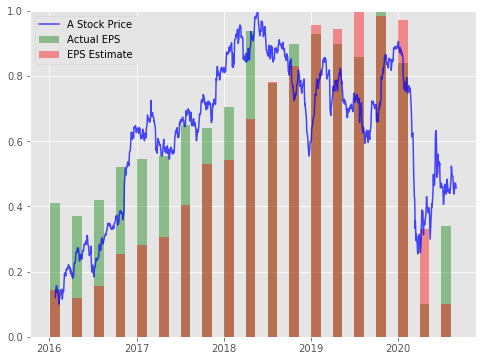

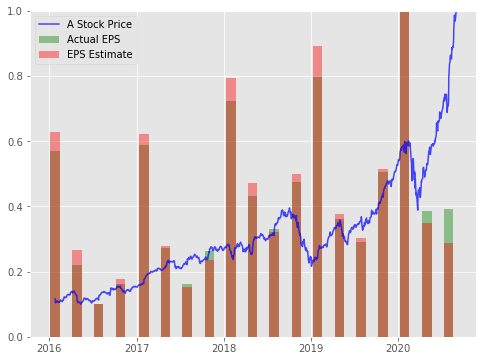

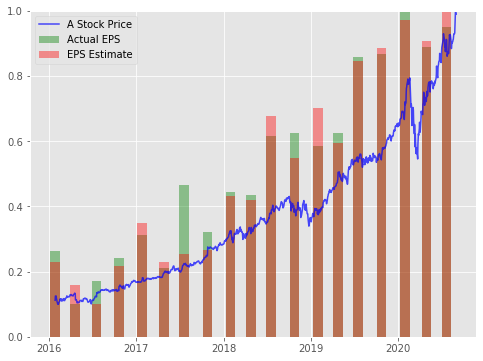

In [46]:
stock_data.sort_values(['Ticker', 'Date'])
def stockvsearnings(stock_data, earnings_data, Ticker):
    data = stock_data[stock_data['Ticker']==Ticker]
    data = data.set_index('Date')
    minmaxscaler = preprocessing.MinMaxScaler(feature_range = (0.1,1))
    data_scaled =pd.DataFrame(minmaxscaler.fit_transform(data[['HLOC']].values))
    data_scaled = data_scaled.set_index(pd.to_datetime(data.index))
    
    earnings_plot = earnings_data[earnings_data['Ticker']== Ticker]
    earnings_plot = earnings_plot.set_index('Earnings_Date')
    earnings_plot = earnings_plot[['Actual_EPS', 'EPS_Estimate']]
    earnings_plot['Actual_EPS'] = (minmaxscaler.fit_transform(earnings_plot['Actual_EPS'].values.reshape(-1,1)))
    earnings_plot['EPS_Estimate'] = (minmaxscaler.fit_transform(earnings_plot['EPS_Estimate'].values.reshape(-1,1)))
    
    plt.style.use('ggplot')
    fig, ax1 = plt.subplots(figsize = (8,6))
    ax1.set_ylim(0,1)

    ax1.plot(data_scaled.index, data_scaled, color = 'blue', alpha = 0.7)
    ax1.bar(earnings_plot.index, earnings_plot['Actual_EPS'],width = 40, color = 'green', alpha = 0.4)
    ax1.bar(earnings_plot.index, earnings_plot['EPS_Estimate'],width = 40, color = 'red', alpha = 0.4)
    ax1.legend(['A Stock Price','Actual EPS', 'EPS Estimate'])
stockvsearnings(stock_data, earnings_data, 'ZION')
stockvsearnings(stock_data, earnings_data, 'AAPL')
stockvsearnings(stock_data, earnings_data, 'MSFT')

In [47]:
earnings_data['Earnings_Change'] = earnings_data.groupby('Ticker')['Actual_EPS'].apply(pd.Series.pct_change)
earnings_data

,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference,earningskey,1daybefore,1dayafter,7daybefore,7dayafter,price,%Price_Change,%SPY_CHANGE,Earnings_Change
0,A,2016-02-16,01/2016,0.430,0.46,post,0.069767,2016-02-16A,NaN,-0.009556,NaN,0.018006,35.3175,NaN,NaN,NaN
1,A,2016-05-16,04/2016,0.390,0.44,post,0.128205,2016-05-16A,0.003722,0.042244,0.049359,0.058643,41.1300,0.164578,0.095559,-0.043478
2,A,2016-08-17,07/2016,0.470,0.49,post,0.042553,2016-08-17A,0.002899,-0.034798,0.023804,-0.021022,46.6975,0.135363,0.063707,0.113636
3,A,2016-11-15,10/2016,0.520,0.59,post,0.134615,2016-11-15A,-0.012098,0.026202,0.043257,-0.012716,43.8900,-0.060121,0.003274,0.204082
4,A,2017-02-14,01/2017,0.490,0.53,post,0.081633,2017-02-14A,-0.005199,0.018956,0.031240,0.024107,48.7975,0.111814,0.077241,-0.101695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9132,ZTS,2019-08-06,06/2019,0.820,0.90,pre,0.097561,2019-08-06ZTS,-0.020290,0.050593,-0.011742,0.078114,118.8300,0.176709,-0.011561,0.022727
9133,ZTS,2019-11-07,Q3,0.883,0.94,pre,0.064553,2019-11-07ZTS,-0.012082,0.018167,-0.031748,-0.030618,122.5950,0.031684,0.081787,0.044444
9134,ZTS,2020-02-13,Q4,0.879,0.92,pre,0.046644,2020-02-13ZTS,-0.001956,0.001837,0.056849,-0.030250,143.1600,0.167747,0.096560,-0.021277
9135,ZTS,2020-05-06,Q1,0.862,0.95,pre,0.102088,2020-05-06ZTS,0.022929,-0.027456,0.040834,-0.047318,126.3700,-0.117281,-0.145064,0.032609


In [48]:
earnings_data['7daybefore'] = earnings_data.groupby('Ticker')['7daybefore'].apply(lambda x: x.fillna(x.mean())).values
earnings_data['Beat'] = earnings_data.groupby('Ticker').apply(lambda x: x['%Difference'] > 0 ).values
earnings_data['After_Increase'] = earnings_data.groupby('Ticker').apply(lambda x: x['7dayafter'] > 0 ).values
earnings_data['Before_Increase'] = earnings_data.groupby('Ticker').apply(lambda x: x['7daybefore'] > 0 ).values


In [49]:
def earningscatfull (before, beat, after):
    if before == True:
        if beat == True:
            if after == True:
                return 'Increase Beat Increase'
            else:
                return 'Increase Beat Decrease'
        else:
            if after == True:
                return 'Increase Short Increase'
            else:
                return 'Increase Short Decrease'
    else:
        if beat == True:
            if after == True:
                return 'Decrease Beat Increase'
            else:
                return 'Decrease Beat Decrease'
        else:
            if after == True:
                return 'Decrease Short Increase'
            else:
                return 'Decrease Short Decrease'
earnings_data['Earnings_Category_Full'] = earnings_data.apply(lambda x : earningscatfull(x['Before_Increase'], x['Beat'], x['After_Increase']), axis = 1)

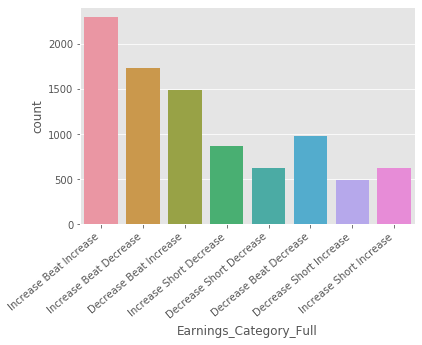

In [50]:
ax = sns.countplot(x = 'Earnings_Category_Full', data = earnings_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [51]:
earnings_data['Earnings_Category_Full'].value_counts()

Increase Beat Increase     2298
Increase Beat Decrease     1740
Decrease Beat Increase     1493
Decrease Beat Decrease      979
Increase Short Decrease     868
Increase Short Increase     631
Decrease Short Decrease     630
Decrease Short Increase     498
Name: Earnings_Category_Full, dtype: int64

In [52]:
c = pd.DataFrame(earnings_data['Earnings_Category_Full'].value_counts())
c = c.reset_index()
c['Before_Stock_Effect'] = ['Increase', 'Increase', 'Decrease', 'Decrease', 'Increase', 'Decrease', 'Increase', 'Decrease']
c['Earnings_Result'] = ['Beat', 'Beat', 'Beat', 'Beat', 'Short', 'Short', "Short", 'Short']
c['After_Stock_Effect'] = ['Increase', 'Decrease', 'Increase', 'Decrease', 'Decrease', 'Decrease', 'Increase', 'Increase']
c['Stock_Effect'] = c[['Before_Stock_Effect', 'After_Stock_Effect']].apply(lambda x: '-'.join(x), axis=1)
cols = c.columns
cols = list(cols[2:]) + list(cols[0:2])
c = c[cols]
c = c.rename(columns ={'Earnings_Category_Full': 'Total_Earnings'})
c = c.rename(columns ={'index': 'Total_Effect'})
c

,Before_Stock_Effect,Earnings_Result,After_Stock_Effect,Stock_Effect,Total_Effect,Total_Earnings
0,Increase,Beat,Increase,Increase-Increase,Increase Beat Increase,2298
1,Increase,Beat,Decrease,Increase-Decrease,Increase Beat Decrease,1740
2,Decrease,Beat,Increase,Decrease-Increase,Decrease Beat Increase,1493
3,Decrease,Beat,Decrease,Decrease-Decrease,Decrease Beat Decrease,979
4,Increase,Short,Decrease,Increase-Decrease,Increase Short Decrease,868
5,Decrease,Short,Decrease,Decrease-Decrease,Increase Short Increase,631
6,Increase,Short,Increase,Increase-Increase,Decrease Short Decrease,630
7,Decrease,Short,Increase,Decrease-Increase,Decrease Short Increase,498


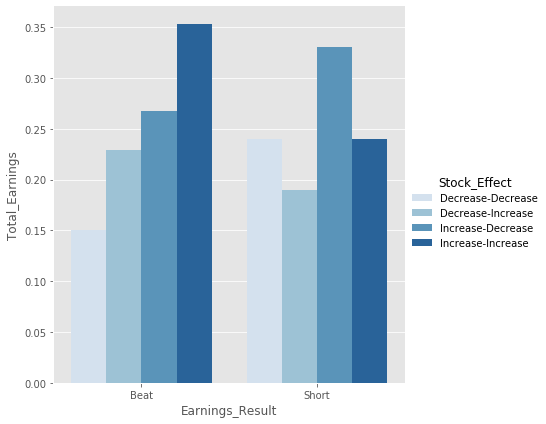

In [53]:
percent_master = c.groupby([ 'Earnings_Result', 'Stock_Effect']).agg({'Total_Earnings': 'sum'})
percent_results = percent_master.groupby(level = 0).apply(lambda x: x/ float(x.sum()))
percent_results = percent_results.reset_index()
c_plot = sns.catplot( data = percent_results, kind = 'bar', x = 'Earnings_Result', y = 'Total_Earnings', 
                     hue ='Stock_Effect' , ci = 'sd', palette = 'Blues', height = 6, alpha= 1)

In [54]:
def pct_dif(row):
    if row['EPS_Estimate'] <= 0.01 and row['EPS_Estimate'] >= 0:
        e_eps = 0.01
        a_eps = row['Actual_EPS']
    elif row['EPS_Estimate']>=-0.01 and row['EPS_Estimate'] <= 0:
        e_eps = -0.01
        a_eps = row['Actual_EPS']
    else:
        e_eps = row['EPS_Estimate']
        a_eps = row['Actual_EPS']
    ret_val = (a_eps -e_eps)/e_eps
    return ret_val
earnings_data['%Difference'] = earnings_data.apply(pct_dif, axis =1)

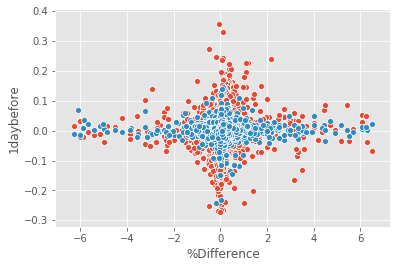

In [55]:
a = earnings_data['%Difference'].dropna()
a = a[np.abs(sp.stats.zscore(earnings_data['%Difference'].dropna())) < 3]
b = earnings_data.loc[a.index]
sns.scatterplot(data = b, x ='%Difference', y ='1dayafter')
sns.scatterplot(data = b, x ='%Difference', y ='1daybefore')